In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset = pd.read_csv("/content/diabetes (1).csv")

print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='count'>

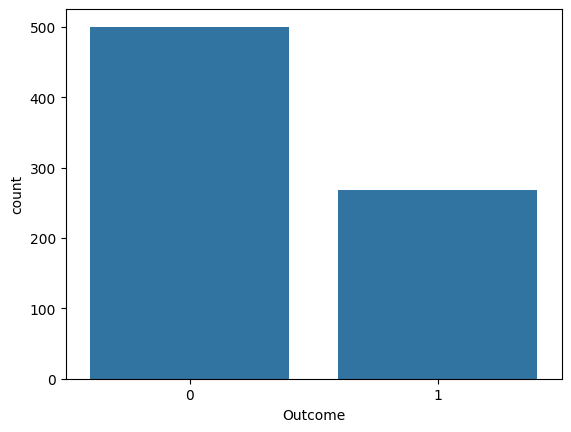

In [ ]:
sns.countplot(x=dataset['Outcome'])

In [ ]:
x = dataset.iloc[:, 1:8]
y = dataset.iloc[:, 8]
print("Features ")
print(x)

Features 
     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ... 

In [ ]:
y = dataset.iloc[:, 8]
print("Target ")
print(y)

Target 
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size = 0.25, random_state =42)

In [ ]:
sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain)

xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

[[ 0.25977903 -3.78077929  0.61677038 -0.69205168  1.03974028  0.29608546
   0.96352088]
 [ 0.25977903  0.89724451 -0.03210586  1.63307692  0.40945373 -0.70087555
  -0.86295593]
 [-1.85825286  0.67966201  0.48699513 -0.69205168  0.31753694 -0.66548048
   1.13747105]
 [-1.2353023   0.13570575 -0.35654397 -0.03757104 -0.24709476  0.2311945
  -0.68900576]
 [-0.58120422  0.29889263  0.16255702 -0.69205168 -4.19951667  0.30493422
  -1.03690611]
 [-0.6746468  -0.84341551 -0.09699348  0.04854483 -0.8379884  -0.92799388
  -0.77598085]
 [-0.42546658 -0.4082505   0.61677038 -0.05479422  0.60641828  0.85060815
  -0.68900576]
 [ 1.53682767 -0.29945925  1.07098374  1.24555549  0.33066791 -0.33217695
  -0.25413033]
 [-1.11071219  0.244497   -1.32985833 -0.69205168 -0.24709476 -0.49735392
   0.1807451 ]
 [-0.58120422  0.46207951  1.26564661  0.08299118  0.33066791 -0.68022843
  -0.77598085]]


In [ ]:
# Create and train the Naive Bayes model (Gaussian Naive Bayes)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
train_score = classifier.score(xtrain, ytrain)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

The Accuracy of training: 76.04 %


In [ ]:
test_score = classifier.score(xtest, ytest)
print(f'Model Score/Performance on Testing data: {round((test_score*100), 2)}')

Model Score/Performance on Testing data: 72.92


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
#Classifier is Object

classifier.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
train_score = classifier.score(xtrain, ytrain)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

The Accuracy of training: 78.47 %


In [ ]:
test_score = classifier.score(xtest, ytest)
print(f'Model Score/Performance on Testing data: {round((test_score*100), 2)}')

Model Score/Performance on Testing data: 73.44


In [ ]:
from sklearn import metrics
predictions = classifier.predict(xtest)
print(metrics.confusion_matrix(ytest,predictions))
print(metrics.classification_report(ytest,predictions))
print(metrics.accuracy_score(ytest,predictions))

[[100  23]
 [ 28  41]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       123
           1       0.64      0.59      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.71       192
weighted avg       0.73      0.73      0.73       192

0.734375
